<a href="https://colab.research.google.com/github/bdi2357/iShares_ETF_holdings_downloader/blob/main/ishares_holdings_downloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import pandas as pd
import numpy as np
import os,sys,re
import requests
import urllib

In [ ]:
#getting ishares products
#using the following url "https://www.ishares.com/us/products/etf-investments#/?productView=etf&pageNumber=1&sortColumn=totalNetAssets&sortDirection=desc&dataView=keyFacts&showAll=true"
etfs_ishares = pd.read_html("https://www.ishares.com/us/products/etf-investments#/?productView=etf&pageNumber=1&sortColumn=totalNetAssets&sortDirection=desc&dataView=keyFacts&showAll=true")

In [ ]:
etfs_ishares[0].shape

(393, 10)

In [ ]:
etfs_list = etfs_ishares[0]
etfs_list.head()

,Ticker,Name,12m Trailing Yield (%),As of,YTD Return (%),As of.1,Incept. Date,Gross Expense Ratio (%),Net Expense Ratio (%),Net Assets (USD)
0,IGLB,iShares 10+ Year Investment Grade Corporate Bo...,4.67,"Sep 01, 2022",-23.13,"Sep 01, 2022","Dec 08, 2009",0.06,0.06,1385804685
1,ILTB,iShares Core 10+ Year USD Bond ETF,4.41,"Sep 01, 2022",-23.26,"Sep 01, 2022","Dec 08, 2009",0.06,0.06,300080470
2,QLTA,iShares Aaa - A Rated Corporate Bond ETF,2.64,"Sep 01, 2022",-13.58,"Sep 01, 2022","Feb 14, 2012",0.15,0.15,1004797260
3,DVYA,iShares Asia/Pacific Dividend ETF,7.30,"Jul 31, 2022",-8.07,"Jul 31, 2022","Feb 23, 2012",0.49,0.49,32928433
4,STIP,iShares 0-5 Year TIPS Bond ETF,7.49,"Sep 01, 2022",-1.03,"Sep 01, 2022","Dec 01, 2010",0.03,0.03,12529385963


In [ ]:
import dateutil

In [ ]:
# date parser
from dateutil.parser import parse as parse_dt
def parse_dm(x):
    if x>9:
        return str(x)
    else:
        return "0"+str(x)
def date2fmt(dt):
    prsd = parse_dt(dt)
    return str(prsd.year)+"-"+parse_dm(prsd.month)+"-"+parse_dm(prsd.day)

In [ ]:
etfs_list["dt_parsed"] = etfs_list.apply(lambda r: date2fmt(r["Incept. Date"]),axis=1)

In [ ]:
#sorting with respect to the initiation date 
etfs_list = etfs_list.sort_values(by = "dt_parsed")

In [ ]:
# finding the refernce of the ETF
def find_etf_url(ticker,big_s):
    return re.findall("\".*?\"",re.findall("<a href=\".*?\">%s"%ticker,big_s)[0])[0][1:-1]

In [ ]:
ishares_etf_page = requests.get("https://www.ishares.com/us/products/etf-investments#/?productView=etf&pageNumber=1&sortColumn=totalNetAssets&sortDirection=desc&dataView=keyFacts&showAll=true")

In [ ]:
ishares_urls = ishares_etf_page.text

In [ ]:
def find_etf_url(ticker,big_s):
    return re.findall("\".*?\"",re.findall("<a href=\".*?\">%s"%ticker,big_s)[0])[0][1:-1]

In [ ]:
etfs_list["url_add"] = etfs_list.apply(lambda r: find_etf_url(r["Ticker"],ishares_urls),axis=1)

In [ ]:
USER_AGENT_LIST = [
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
        'Mozilla/5.0 (Windows NT 5.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36',
        'Mozilla/4.0 (compatible; MSIE 9.0; Windows NT 6.1)',
        'Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0)',
        'Mozilla/5.0 (Windows NT 6.1; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (Windows NT 6.2; WOW64; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.0; Trident/5.0)',
        'Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0)',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; WOW64; Trident/6.0)',
        'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; Trident/6.0)',
        'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident/4.0; .NET CLR 2.0.50727; .NET CLR 3.0.4506.2152; .NET CLR 3.5.30729)'
    ]

In [ ]:
def response2df(txt):
    if txt.find("Ticker") != -1:
        L = txt[txt.find("Ticker"):].split("\n")
        columns=L[0].split(",")
        #print(L[:3])
        data = [[x[1:-1] for x in re.findall("\".*?\"",row)] for row in L[1:]]
        #print("H1")
        df = pd.DataFrame(data=data,columns = columns)
        #print("H2")
        df = df[df.apply(lambda r: isinstance(r["Ticker"],str) and re.findall("[A-Z0-9]*",r["Ticker"])[0] == r["Ticker"],axis=1)]
        #print("H3")
        return df
    elif  txt.find("Duration") != -1:
        L = txt[txt.find("Name"):].split("\n")
        columns=L[0].split(",")
        #print(columns)
        #print(L[:3])
        data = [[x[1:-1] for x in re.findall("\".*?\"",row)] for row in L[1:]]
        #print("H1")
        
        df = pd.DataFrame(data=data,columns = columns)
        #print("H2")
        #df = df[df.apply(lambda r: isinstance(r["Ticker"],str) and re.findall("[A-Z0-9]*",r["Ticker"])[0] == r["Ticker"],axis=1)]
        #print("H3")
        return df
        

In [ ]:
#Downloading the etf to designated location
import random
def etf_holdings2(ticker,date,out_dir):
    url_base = "https://www.ishares.com%s/1467271812596.ajax?fileType=csv&fileName=%s_holdings&dataType=fund&asOfDate=%s"
    product_url = etfs_list.loc[etfs_list['Ticker'] == ticker, "url_add"].iloc[0] #etfs_list["url_add"]
    url = url_base%(product_url,ticker,date)
    
    
    headers = random.choice(USER_AGENT_LIST)
    opener = urllib.request.build_opener()
    opener.addheaders = [("User-Agent",headers)]
    urllib.request.install_opener(opener)
    #req = requests.get(url, headers=headers)
    tar_file = os.path.join(out_dir,'%s_holdings_%s.csv'%(ticker,date))
    return urllib.request.urlretrieve(url,tar_file ),tar_file


In [ ]:
"""
The rebalancing reference date is the second Friday of March, June, September, 
and December.
"""

'\nThe rebalancing reference date is the second Friday of March, June, September, \nand December.\n'

In [ ]:
import calendar
import pandas_market_calendars as mcal
def last_business_day_in_month(year: int, month: int) -> int:
    return max(calendar.monthcalendar(year, month)[-1:][0][:5])

for year in range(2011,2012):
    for month in [3,6,9,12]:
        print(last_business_day_in_month(year,month))

def mnth(m):
    if m<10:
        return '0'+str(m)
    else:
        return str(m)
def first_trading_day_after_21_in_month(year: int, month: int, frm = 22) -> int:
    nyse = mcal.get_calendar('NYSE')
    start_date = '%s-%s-%s'%(str(year),mnth(month),str(frm))
    end_date = '%s-%s-29'%(str(year),mnth(month))
    
    #print(nyse.valid_days(start_date = start_date, end_date = end_date)[-1])
    return nyse.valid_days(start_date = start_date, end_date = end_date)[-1].date().day
    
first_trading_day_after_21_in_month(2012,4)   

31
30
30
30


27

In [ ]:
import time
from datetime import datetime as dttm
ticker = "IWM"
home_dir = "."
def mnth(m):
    if m<10:
        return '0'+str(m)
    else:
        return str(m)
def download_holdings_from_2011(ticker,home_dir):
    tar_dir = os.path.join(home_dir,ticker)
    if not os.path.isdir(tar_dir):
        os.mkdir(tar_dir)
    cur_year = dttm.now().year
    cur_month = dttm.now().month
    inception_dt = etfs_list.loc[etfs_list['Ticker'] == ticker, "dt_parsed"].iloc[0]
    
    start_year =  max(2011,int(inception_dt.split("-")[0]))
    for year in range(start_year,cur_year+1):
        for month in [3,6,9,12]:
            time.sleep(2)
            #print(year,month)
            day = last_business_day_in_month(year,month)#first_trading_day_after_21_in_month(year,month)
            dt = str(year)+mnth(month)+str(day)
            if (year < cur_year or month < cur_month) and not (year == start_year and month <= int(inception_dt.split("-")[1])):
                f_path = etf_holdings2(ticker,dt,tar_dir)[1]
                flg = True
                frm = 22
                while frm < 28 and test_is_valid_holding_file(f_path) != "Success":
                    os.system("rm %s"%f_path)
                    
                    day = first_trading_day_after_21_in_month(year,month)
                    dt = str(year)+mnth(month)+str(day)
                    frm+=1

                    
                
        

In [ ]:
from pathlib import Path
home = str(Path.home())
tar_path = os.path.join(home,"iSharesHoldings")
if not os.path.isdir(tar_path):
    os.mkdir(tar_path)

In [ ]:
etfs_list["Net Assets (USD)"] = etfs_list["Net Assets (USD)"].astype(float)

In [ ]:
etfs_list = etfs_list.sort_values(by="Net Assets (USD)",ascending=False)
etfs_list[:30]

,Ticker,Name,12m Trailing Yield (%),As of,YTD Return (%),As of.1,Incept. Date,Gross Expense Ratio (%),Net Expense Ratio (%),Net Assets (USD),dt_parsed,url_add
171,IVV,iShares Core S&P 500 ETF,1.44,"Jul 31, 2022",-16.79,"Jul 31, 2022","May 15, 2000",0.03,0.03,2.936458e+11,2000-05-15,/us/products/239726/ishares-core-sp-500-etf
219,IEFA,iShares Core MSCI EAFE ETF,4.39,"Jul 31, 2022",-21.84,"Jul 31, 2022","Oct 18, 2012",0.07,0.07,8.209449e+10,2012-10-18,/us/products/244049/ishares-core-msci-eafe-etf
12,AGG,iShares Core U.S. Aggregate Bond ETF,2.25,"Sep 01, 2022",-10.84,"Sep 01, 2022","Sep 22, 2003",0.04,0.03,8.190634e+10,2003-09-22,/us/products/239458/ishares-core-total-us-bond...
210,IJR,iShares Core S&P Small-Cap ETF,1.68,"Jul 31, 2022",-16.38,"Jul 31, 2022","May 22, 2000",0.06,0.06,6.450812e+10,2000-05-22,/us/products/239774/ishares-core-sp-smallcap-etf
220,IEMG,iShares Core MSCI Emerging Markets ETF,4.02,"Jul 31, 2022",-19.16,"Jul 31, 2022","Oct 18, 2012",0.09,0.09,6.404181e+10,2012-10-18,/us/products/244050/ishares-core-msci-emerging...
152,IWF,iShares Russell 1000 Growth ETF,0.67,"Jul 31, 2022",-24.16,"Jul 31, 2022","May 22, 2000",0.18,0.18,6.044088e+10,2000-05-22,/us/products/239706/ishares-russell-1000-growt...
199,IJH,iShares Core S&P Mid-Cap ETF,1.43,"Jul 31, 2022",-14.93,"Jul 31, 2022","May 22, 2000",0.05,0.05,6.005281e+10,2000-05-22,/us/products/239763/ishares-core-sp-midcap-etf
156,IWM,iShares Russell 2000 ETF,1.20,"Jul 31, 2022",-18.73,"Jul 31, 2022","May 22, 2000",0.19,0.19,5.174184e+10,2000-05-22,/us/products/239710/ishares-russell-2000-etf
154,IWD,iShares Russell 1000 Value ETF,1.86,"Jul 31, 2022",-10.48,"Jul 31, 2022","May 22, 2000",0.18,0.18,5.130148e+10,2000-05-22,/us/products/239708/ishares-russell-1000-value...
95,EFA,iShares MSCI EAFE ETF,4.59,"Jul 31, 2022",-21.32,"Jul 31, 2022","Aug 14, 2001",0.32,0.32,4.302589e+10,2001-08-14,/us/products/239623/ishares-msci-eafe-etf


In [ ]:
from datetime import datetime as dttm
import glob

In [ ]:
def test_is_valid_holding_file(file_path):
    try :
        txt = open(file_path,'r').read()
    except:
        return "Error opening file"
    try :
        df = response2df(txt)
        #print(df.head())
        #print(type(df))
        if df.shape[0]>0 :
            #print(df.shape)
            #print(df.head())
            #print("TEST1")
            basename = os.path.basename(file_path)
            #os.path.dirname(os.path.realpath(__file__))
            dr = os.path.dirname(os.path.realpath(file_path))

            df.to_csv(os.path.join(dr,basename.replace(".csv","_f.csv")))
        else:
            return "Error transforming to valid csv"

        return "Success"
    except:
        return "Error transforming to valid csv"

In [ ]:
glob.glob(os.path.join(tar_path,"SHV"))


['/Users/itaybendan/iSharesHoldings/SHV']

In [ ]:
import glob
ticker = "SHV"
test_dir = os.path.join(tar_path,ticker) 
files = glob.glob(os.path.join(test_dir,"*"))
files = [f for f in files if f.find("_f.csv")==-1]
for f in files:
    print(f,test_is_valid_holding_file(f))

/Users/itaybendan/iSharesHoldings/SHV/SHV_holdings_20220630.csv Success
/Users/itaybendan/iSharesHoldings/SHV/SHV_holdings_20170929.csv Success
/Users/itaybendan/iSharesHoldings/SHV/SHV_holdings_20200331.csv Success
/Users/itaybendan/iSharesHoldings/SHV/SHV_holdings_20180629.csv Success
/Users/itaybendan/iSharesHoldings/SHV/SHV_holdings_20130329.csv Error transforming to valid csv
/Users/itaybendan/iSharesHoldings/SHV/SHV_holdings_20171229.csv Success
/Users/itaybendan/iSharesHoldings/SHV/SHV_holdings_20160331.csv Success
/Users/itaybendan/iSharesHoldings/SHV/SHV_holdings_20121231.csv Success
/Users/itaybendan/iSharesHoldings/SHV/SHV_holdings_20140630.csv Success
/Users/itaybendan/iSharesHoldings/SHV/SHV_holdings_20170331.csv Success
/Users/itaybendan/iSharesHoldings/SHV/SHV_holdings_20131231.csv Success
/Users/itaybendan/iSharesHoldings/SHV/SHV_holdings_20150630.csv Success
/Users/itaybendan/iSharesHoldings/SHV/SHV_holdings_20190628.csv Success
/Users/itaybendan/iSharesHoldings/SHV/SH

In [ ]:
%%time
from time import sleep
for ticker in list(etfs_list[37:79]["Ticker"]):
    print("Ticker %s try"%ticker)
    try:
        download_holdings_from_2011(ticker,tar_path)
        sleep(2)
    except:
        print("Error in %s"%ticker)


Ticker EFV try
Ticker IWS try
Ticker STIP try
Ticker HDV try
Ticker HYG try
Ticker IEI try
Ticker IWN try
Ticker IWP try
Ticker IUSV try
Ticker IUSG try
Ticker IWV try
Ticker SCZ try
Ticker MTUM try
Ticker EWJ try
Ticker IGIB try
Ticker EFG try
Ticker FLOT try
Ticker IWO try
Ticker SUB try
Ticker VLUE try
Ticker SLV try
Ticker USHY try
Ticker OEF try
Ticker IBB try
Ticker MCHI try
Ticker IJJ try
Ticker IJS try
Ticker IDEV try
Ticker USIG try
Ticker ICSH try
Ticker IJK try
Ticker IYW try
Ticker ESGD try
Ticker IHI try
Ticker EEMV try
Ticker SOXX try
Ticker IJT try
Ticker EFAV try
Ticker ICLN try
Ticker ISTB try
Ticker EWZ try
Ticker FXI try
CPU times: user 4min 32s, sys: 11.5 s, total: 4min 44s
Wall time: 1h 24min 59s


In [ ]:
list(etfs_list["Ticker"]).index("SHYG")

79

In [ ]:
tar_path

'/Users/itaybendan/iSharesHoldings'

In [ ]:
len(glob.glob(os.path.join(tar_path,"*")))

76

In [ ]:
ticker = "AGG"
L = glob.glob(os.path.join(tar_path,ticker,"*_f.csv"))
d_agg = pd.read_csv(L[0])
sm = (d_agg["Weight (%)"]* (d_agg["Coupon (%)"]*0.01)).sum()*0.01
d_agg.head()

,Unnamed: 0,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Par Value,CUSIP,ISIN,...,Maturity,Coupon (%),Mod. Duration,Yield to Call (%),Yield to Worst (%),Real Duration,Real YTM (%),Market Currency,Accrual Date,Effective Date
0,0,BLACKROCK CASH CL INST SL AGENCY,Cash and/or Derivatives,Money Market,"4,703,249,394.32",10.83,"4,703,249,394.32","4,701,350,049.00",066922519,US0669225197,...,-,0.98,0.00,-,0.98,0.00,0.98,USD,-,-
1,1,FNMA 30YR TBA(REG A),MBS Pass-Through,Fixed Income,"890,439,863.68",2.05,"890,439,863.68","897,338,000.00",01F030645,-,...,"Apr 12, 2017",3.00,7.65,-,3.11,7.65,3.11,USD,-,-
2,2,GNMA2 30YR TBA(REG C),MBS Pass-Through,Fixed Income,"807,614,657.33",1.86,"807,614,657.33","799,600,000.00",21H030641,-,...,"Apr 20, 2017",3.00,7.69,-,2.89,7.69,2.89,USD,-,-
3,3,FNMA 30YR 2015 PRODUCTION,MBS Pass-Through,Fixed Income,"538,339,054.35",1.24,"538,339,054.35","524,318,272.00",3140FCP69,-,...,"Sep 01, 2046",3.50,6.03,-,3.11,6.03,3.11,USD,-,-
4,4,FGOLD 30YR TBA(REG A),MBS Pass-Through,Fixed Income,"536,238,614.68",1.23,"536,238,614.68","540,771,542.00",02R030640,-,...,"Apr 12, 2017",3.00,7.67,-,3.12,7.67,3.12,USD,-,-


In [ ]:
def avg_cuppon(d_agg,col):
    #"Weight (%)"
    return (d_agg["Weight (%)"]* (d_agg[col]*0.01)).sum()

In [ ]:
import matplotlib.pyplot as plt
def plot_avg_cuppon_by_years(ticker,tar_path,pfx,cols = ["Coupon (%)",'Mod. Duration']):
    L = glob.glob(os.path.join(tar_path,ticker,"*_%s.csv"%pfx))
    #print(L)
    L.sort()
    D_cols = {c:[] for c in cols}
    B21 = []
    for x in L:
        #A21.append( (x.split("_")[-2],avg_cuppon(pd.read_csv(x))))
        try :
            for c in cols:
                D_cols[c].append( (x.split("_")[-2],avg_cuppon(pd.read_csv(x),c)))
        except:
            B21.append((c,x))
    #print(len(A21))
    print(len(B21))
    dfs = {}
    tar_fig_sv = os.path.join(tar_path,ticker,ticker+"_fig")
    if not os.path.isdir(tar_fig_sv):
        os.mkdir(tar_fig_sv)
    for c in cols:
        dfs[c] = pd.DataFrame(data=D_cols[c],columns=["date","avg "+c])
        #dfs[c]["date"] = dfs[c].apply(lambda r:  r["date"][:4]+"-"+r["date"][4:6]+"-"+r["date"][6:8],axis =1)
        dfs[c]["date"] = dfs[c].apply(lambda r:  r["date"][:4]+"-"+r["date"][4:6],axis =1)
        dfs[c] = dfs[c].set_index("date")
        plt.clf()
        fig = dfs[c]["avg "+c].plot(title = "%s avg %s"%(ticker,c)).get_figure()
        fig.savefig('%s_avg_%s.pdf'%(ticker,c))
        
    
    

In [ ]:
Lx = os.listdir(tar_path) 
Lx[:5]

['AGG', 'FXI', 'IHI', 'IDEV', 'USMV']

In [ ]:
"""
cnt = 0
st = time.time()
for ticker in Lx:
    test_dir  = os.path.join(tar_path,ticker)
    files = glob.glob(os.path.join(test_dir,"*"))
    files = [f for f in files if f.find("_f.csv")==-1]
    for f in files:
        cnt+=1
        test_is_valid_holding_file(f)
        if cnt%100 == 0:
            print("%0.2f"%(time.time() - st))
"""
    

'\ncnt = 0\nst = time.time()\nfor ticker in Lx:\n    test_dir  = os.path.join(tar_path,ticker)\n    files = glob.glob(os.path.join(test_dir,"*"))\n    files = [f for f in files if f.find("_f.csv")==-1]\n    for f in files:\n        cnt+=1\n        test_is_valid_holding_file(f)\n        if cnt%100 == 0:\n            print("%0.2f"%(time.time() - st))\n'

4


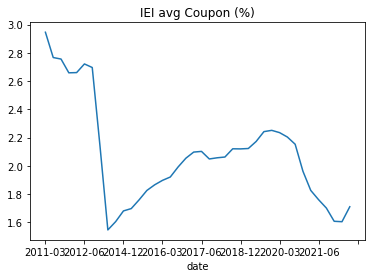

In [ ]:
plot_avg_cuppon_by_years("IEI",tar_path,"f",["Coupon (%)"])